In [28]:
from recycle_dataset import RecycleDataset
import torch
import math
from torch.utils.data import DataLoader

class CFG:
    PROJECT_PATH = "/opt/ml/save_the_earth"
    BASE_DATA_PATH = '/opt/ml/input/data'

    # environment_parameters
    coco_json = '/opt/ml/input/data/train_all.json'

    # hyper_parameters
    learning_rate = 1e-4
    train_batch_size = 1
    nepochs = 30
    patience = 5
    seed = 42
    num_workers = 4

    # model_parameters
    model = "EfficientDet6"
    optimizer = "AdamW"
    scheduler = "StepLR"
    train_augmentation = "BaseTrainAugmentation"
    val_augmentation = "BaseValAugmentation"
    kfold = 0
    print_freq = 1
    model_save_name = "EfficientDet6"

    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    docs_path = 'docs'
    models_path = 'models'

In [14]:
def collate_fn(batch):
    return tuple(zip(*batch))

all_dataset = RecycleDataset(data_dir=CFG.BASE_DATA_PATH,
                             annotation=CFG.coco_json,
                             mode='train',
                             transform=None)

# define data loader based on each dataset
dataloader = DataLoader(all_dataset,
                        batch_size=CFG.train_batch_size,
                        shuffle=False,
                        num_workers=CFG.num_workers,
                        pin_memory=True,
                        collate_fn=collate_fn)

loading annotations into memory...
Done (t=7.20s)
creating index...
index created!


In [48]:
ratios = []

for images, targets, _ in dataloader:
    box = targets[0]['boxes']
    for x1, y1, x2, y2 in box:
        ratios.append(abs((y2-y1)/(x2-x1)))

print(ratios)

1628934290443, 2.724390243902439, 0.8546511627906977, 0.8071808510638294, 0.8837535014005597, 2.320261437908497, 2.383399209486166, 2.1941362916006337, 1.7373674360573923, 10.747211895910782, 4.885021097046413, 5.152505446623093, 7.128012048192773, 5.10520722635494, 7.9212598425196825, 7.986564299424181, 7.041459369817578, 8.835758835758837, 6.711838006230527, 2.7443946188340806, 8.456709956709956, 9.927680798004989, 10.345177664974619, 11.131016042780749, 0.5602484472049689, 2.5603932584269664, 2.591286307053942, 2.877099236641221, 3.2596232596232606, 8.110360360360366, 2.615789473684211, 3.1370558375634516, 0.5606967882416983, 0.5037542662116041, 0.7963709677419352, 0.4444444444444444, 0.4496356622374625, 3.3688524590163924, 3.906724511930584, 3.3054830287206256, 3.7325581395348832, 3.933333333333334, 1.5692055692055689, 5.107594936708861, 10.775757575757577, 0.8951741770533718, 5.0272, 6.199501246882794, 5.62471395881007, 4.780392156862746, 4.4116575591985425, 4.013422818791945, 3.7

In [49]:
print(len(ratios))

26400


(array([ 410., 1623., 3086., 3870., 3577., 3103., 2574., 1981., 1488.,
        1138.]),
 array([0.01680672, 0.21512605, 0.41344538, 0.61176471, 0.81008403,
        1.00840336, 1.20672269, 1.40504202, 1.60336134, 1.80168067,
        2.        ]),
 <BarContainer object of 10 artists>)

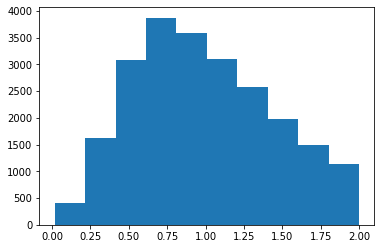

In [81]:
import numpy as np
import matplotlib.pyplot as plt
ratio_filt = np.array(ratios)
ratio_filt_1 = ratio_filt[(ratio_filt < 1)]
ratio_filt_2 = ratio_filt[(ratio_filt < 2)] 
plt.hist(ratio_filt_2)
